In [2]:
import pandas as pd
df = pd.read_csv('accepted_merged_final.csv',low_memory=False, encoding='cp1252')
df.head()

,acc_open_past_24mths,addr_state,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,credit_age,delinq_2yrs,delinq_amnt,dti,...,purpose,recoveries,revol_bal,revol_util,term,total_acc,total_pymnt_inv,total_rec_int,total_rec_prncp,verification_status
0,0,GA,30000,0,1.12,0,17,0,0,1.00,...,car,122.9,1687,9.4,60,4,1014.53,435.17,456,Source Verified
1,0,CA,49200,0,0.00,0,20,0,0,20.00,...,other,0.0,5598,21.0,36,37,12231.89,2214.92,10000,Source Verified
2,0,OR,80000,0,0.00,0,21,0,0,17.94,...,other,0.0,27783,53.9,60,38,4066.91,1066.91,3000,Source Verified
3,0,NC,47004,0,0.00,0,11,0,0,23.51,...,debt_consolidation,0.0,17726,85.6,60,11,10137.84,3137.84,7000,Not Verified
4,0,CA,48000,0,0.00,0,7,0,0,5.35,...,car,0.0,8221,87.5,36,4,3939.14,939.14,3000,Source Verified


In [3]:

import datetime

from sklearn.utils import shuffle
shuffled_df = shuffle(df) #df_normalized
shuffled_df.head()

,acc_open_past_24mths,addr_state,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,credit_age,delinq_2yrs,delinq_amnt,dti,...,purpose,recoveries,revol_bal,revol_util,term,total_acc,total_pymnt_inv,total_rec_int,total_rec_prncp,verification_status
629453,11,OH,95000,0,0.00,0,16,0,0,10.16,...,debt_consolidation,0.00,10729,28.1,36,46,21164.74,364.74,20800,Verified
763248,5,LA,40000,0,0.00,0,9,0,0,27.21,...,debt_consolidation,0.00,12959,52.0,60,20,11297.45,6052.32,5273,Source Verified
697719,4,PA,55000,0,0.00,0,7,0,0,22.21,...,debt_consolidation,0.00,5358,72.4,36,9,3463.96,757.77,2706,Source Verified
94939,5,NJ,80000,0,610.75,0,17,0,0,16.29,...,debt_consolidation,3398.75,14068,42.5,60,14,19143.45,9129.33,6615,Verified
473115,1,GA,75000,0,0.00,0,20,0,0,12.40,...,debt_consolidation,0.00,23601,37.5,36,28,6771.52,810.25,5961,Source Verified


In [4]:
#using label encoder to convert categorical columns into numeric values
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                if feature!='Deliquency':
                    df[feature] = le.fit_transform(df[feature])
                else:
                    print('Hello')
                    df[feature] = df[feature]
            except:
                print('Error encoding '+feature)
        return df

In [5]:
from sklearn.preprocessing import LabelEncoder
# columns = ['Amount_Requested','Loan_Title','Risk_Score','Debt-To-Income_Ratio','Zip_Code','Employment_Length','Policy_Code','accept_reject_loan','State']


# X = pd.DataFrame(shuffled_df) 
df_new = shuffled_df.copy()# makes a separate copy of the dataframe, not a shared instance
# df_new = shuffled_df
X_enc=dummyEncode(df_new)
X_enc.head()

,acc_open_past_24mths,addr_state,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,credit_age,delinq_2yrs,delinq_amnt,dti,...,purpose,recoveries,revol_bal,revol_util,term,total_acc,total_pymnt_inv,total_rec_int,total_rec_prncp,verification_status
629453,11,35,95000,0,0.00,0,16,0,0,10.16,...,2,0.00,10729,28.1,36,46,21164.74,364.74,20800,2
763248,5,18,40000,0,0.00,0,9,0,0,27.21,...,2,0.00,12959,52.0,60,20,11297.45,6052.32,5273,1
697719,4,38,55000,0,0.00,0,7,0,0,22.21,...,2,0.00,5358,72.4,36,9,3463.96,757.77,2706,1
94939,5,31,80000,0,610.75,0,17,0,0,16.29,...,2,3398.75,14068,42.5,60,14,19143.45,9129.33,6615,2
473115,1,10,75000,0,0.00,0,20,0,0,12.40,...,2,0.00,23601,37.5,36,28,6771.52,810.25,5961,1


In [6]:
### Needed dataset
from sklearn import *
# iris=datasets.load_iris()
print("Shape >> ",df.shape)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


Shape >>  (1309103, 51)


In [7]:
### Needed modules and functions
import numpy as np
import scipy
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# np.array(df)

In [15]:
### Defining different number of clusters and calculate wss for each of them
print(datetime.datetime.now()," Defining begins... ")
K = range(1,15)
KM = [kmeans(np.array(X_enc),k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares
print(datetime.datetime.now()," Defigning done... ")

2017-04-14 12:44:39.119926  Defining begins... 
2017-04-14 14:47:16.297118  Defigning done... 


2017-04-14 12:44:12.256194  Plotting bend graph... 


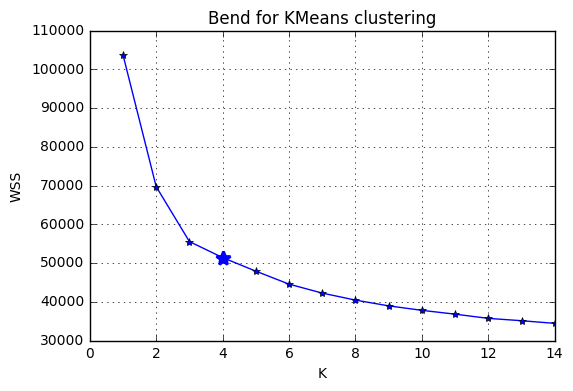

2017-04-14 12:44:12.587842  Done plotting!!  


In [13]:
print(datetime.datetime.now()," Plotting bend graph... ")
kIdx = 3
### Bend graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='*', markersize=10, 
    markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('WSS')
plt.title('Bend for KMeans clustering')
plt.show()
print(datetime.datetime.now()," Done plotting!!  ")

In [ ]:
from sklearn import cluster
# from sklearn.decomposition import PCA


In [ ]:
# print("Dim reduction begins...")
# pca = PCA(n_components=2).fit(X_enc)
# pca_2d = pca.transform(X_enc)
# print("Dim reduction done !!")

In [ ]:
print(datetime.datetime.now()," Clustering begins... ")
k_means=cluster.KMeans(n_clusters=6).fit(X_enc)
print(datetime.datetime.now()," Done!!... ")

In [ ]:
import numpy as np
from pandas import *

In [ ]:
df1=pd.DataFrame(shuffled_df)
df2=pd.DataFrame(k_means.labels_,columns=['kmean.label'])
df_clustered=pd.concat([df1, df2], axis=1)
# df_clustered

In [ ]:
print("Grouping into clusters...")
grouped = df_clustered.groupby(['kmean.label'])
l_grouped = list(grouped)

In [ ]:
print("Exporting clusters as individual dataframes...")
count = 0
h_cluster =[]
for hierarchy_group in l_grouped:
    df_clustered = l_grouped[count][1]
    h_cluster.append(df_clustered)
    print("Cluster ",count," of " ,len(df_clustered), " rows!")
    csv_name = "K-means_Cluster_"+str(count)+".csv"
    df_clustered.to_csv(csv_name, index= False, encoding='cp1252')
#     put_file(credentials_1,csv_name) ## after to_csv
    count+=1

In [ ]:
df['grade'].value_counts()

In [ ]:
print("Grouping into clusters...")
grade_grouped = df.groupby(['grade'])

g_grouped = list(grade_grouped)
   
g_grouped[0]

In [128]:
print("Exporting clusters as individual dataframes...")
count = 0
g_cluster =[]
for manual_group in g_grouped:
    df_g_clustered = g_grouped[count][1]
    g_cluster.append(df_g_clustered)
    print("Manual Cluster ",count," of " ,len(df_g_clustered), " rows!")
    csv_name = "Manual_Grade_Cluster_"+str(count)+".csv"
    df_g_clustered.to_csv(csv_name, index= False, encoding='cp1252')
#     put_file(credentials_1,csv_name) ## after to_csv
    count+=1
    
# g_cluster[1].head()    

Exporting clusters as individual dataframes...
Manual Cluster  0  of  214873  rows!
<Response [201]>
Manual Cluster  1  of  385126  rows!
<Response [201]>
Manual Cluster  2  of  375833  rows!
<Response [201]>
Manual Cluster  3  of  197362  rows!
<Response [201]>
Manual Cluster  4  of  95813  rows!
<Response [201]>
Manual Cluster  5  of  32136  rows!
<Response [201]>
Manual Cluster  6  of  7960  rows!
<Response [201]>


In [ ]:
#Visualize clusters using t-SNE
%pylab inline
from sklearn.manifold import TSNE
# from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [ ]:
# iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(df_X_clustered.head(50))
X_pca = PCA().fit_transform(df_X_clustered.head(50))

In [ ]:
y = np.array(df_X_clustered['kmean.label'].head(50))
# len(y)

In [ ]:
figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=y)